# Regression Models for Possum Data



### **Overview**
A Python-based machine learning pipeline that:
1. **Automatically downloads** the possum dataset from Kaggle (with fallback to a public source)
2. **Predicts 3 key biological traits**:
   - Age (regression)
   - Head length (regression)
   - Sex (binary classification)

### **Key Components**
1. **Data Pipeline**:
   - Automated Kaggle API downloader
   - Cleansing (handles missing values, encodes categories)
   - Train-test splitting

2. **Machine Learning Models**:
   - Linear Regression for continuous traits (age/head length)
   - Logistic Regression for sex classification
   - StandardScaler for feature normalization

3. **Evaluation & Visualization**:
   - Metrics: MSE, R² for regressions; accuracy for classification
   - Visualizations:
     - Actual vs. Predicted plots
     - Residual analysis
     - Confusion matrices
     - Feature importance charts

4. **Testing Capabilities**:
   - Full model evaluation on test sets
   - Prediction function for new possum specimens

### **Technical Stack**
- Python (pandas, scikit-learn, matplotlib/seaborn)
- Kaggle API integration
- Automated data validation

This end-to-end system transforms raw biological data into actionable insights about possum characteristics, suitable for ecological research or wildlife management applications. The modular design allows easy extension to predict additional traits or incorporate more advanced models.


In [2]:
import kagglehub
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder

# 1. Download the dataset using Kaggle API
def download_possum_data():
    try:
        print("Downloading dataset from Kaggle...")
        download_path = kagglehub.dataset_download("abrambeyer/openintro-possum")
        print(f"Dataset downloaded to: {download_path}")

        # Find the CSV file in the downloaded directory
        for file in os.listdir(download_path):
            if file.endswith('.csv'):
                data_file = os.path.join(download_path, file)
                return data_file

        raise FileNotFoundError("No CSV file found in the downloaded dataset")
    except Exception as e:
        print(f"Error downloading dataset: {e}")
        return None

# 2. Load and preprocess the data
def load_and_preprocess(data_file):
    df = pd.read_csv(data_file)

    # Clean the data
    df = df.dropna()  # Remove rows with missing values
    df = df.drop('case', axis=1)  # Remove observation number

    # Convert categorical variables
    df['Pop'] = LabelEncoder().fit_transform(df['Pop'])  # Vic=1, other=0
    df['sex'] = LabelEncoder().fit_transform(df['sex'])   # m=1, f=0

    return df

# 3. Regression model for age prediction
def age_prediction_model(X_train, X_test, y_train, y_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    model = LinearRegression()
    model.fit(X_train_scaled, y_train)

    pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, pred)
    print(f"\nAge Prediction Model:")
    print(f"MSE: {mse:.2f}")
    print(f"R^2 Score: {model.score(X_train_scaled, y_train):.2f}")

    return model

# 4. Regression model for head length prediction
def head_length_model(X_train, X_test, y_train, y_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    model = LinearRegression()
    model.fit(X_train_scaled, y_train)

    pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, pred)
    print(f"\nHead Length Prediction Model:")
    print(f"MSE: {mse:.2f}")
    print(f"R^2 Score: {model.score(X_train_scaled, y_train):.2f}")

    return model

# 5. Classification model for sex prediction
def sex_prediction_model(X_train, X_test, y_train, y_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    model = LogisticRegression()
    model.fit(X_train_scaled, y_train)

    pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, pred)
    print(f"\nSex Prediction Model:")
    print(f"Accuracy: {acc:.2f}")

    return model

# Main execution
if __name__ == "__main__":
    # Download and load data
    data_file = download_possum_data()
    if data_file is None:
        print("Failed to download data. Using fallback option...")
        # Fallback: Load from URL if Kaggle download fails
        data_url = "https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/DAAG/possum.csv"
        df = pd.read_csv(data_url)
        df = df.dropna()
        df = df.drop('case', axis=1)
        df['Pop'] = LabelEncoder().fit_transform(df['Pop'])
        df['sex'] = LabelEncoder().fit_transform(df['sex'])
    else:
        df = load_and_preprocess(data_file)

    # Prepare data for all models
    # For age prediction (exclude other targets)
    X_age = df.drop(['age', 'hdlngth', 'sex'], axis=1)
    y_age = df['age']

    # For head length prediction
    X_hdl = df.drop(['hdlngth', 'age', 'sex'], axis=1)
    y_hdl = df['hdlngth']

    # For sex prediction
    X_sex = df.drop(['sex', 'age', 'hdlngth'], axis=1)
    y_sex = df['sex']

    # Split all datasets (using same random state for consistency)
    X_train_age, X_test_age, y_train_age, y_test_age = train_test_split(
        X_age, y_age, test_size=0.2, random_state=42)

    X_train_hdl, X_test_hdl, y_train_hdl, y_test_hdl = train_test_split(
        X_hdl, y_hdl, test_size=0.2, random_state=42)

    X_train_sex, X_test_sex, y_train_sex, y_test_sex = train_test_split(
        X_sex, y_sex, test_size=0.2, random_state=42)

    # Train and evaluate all models
    age_model = age_prediction_model(X_train_age, X_test_age, y_train_age, y_test_age)
    hdl_model = head_length_model(X_train_hdl, X_test_hdl, y_train_hdl, y_test_hdl)
    sex_model = sex_prediction_model(X_train_sex, X_test_sex, y_train_sex, y_test_sex)

    print("\nAll models trained successfully!")

Dataset downloaded to: /kaggle/input/openintro-possum

Age Prediction Model:
MSE: 4.89
R^2 Score: 0.28

Head Length Prediction Model:
MSE: 3.58
R^2 Score: 0.70

Sex Prediction Model:
Accuracy: 0.67

All models trained successfully!



=== Age Prediction Model ===
MSE: 4.66
R²: -0.03


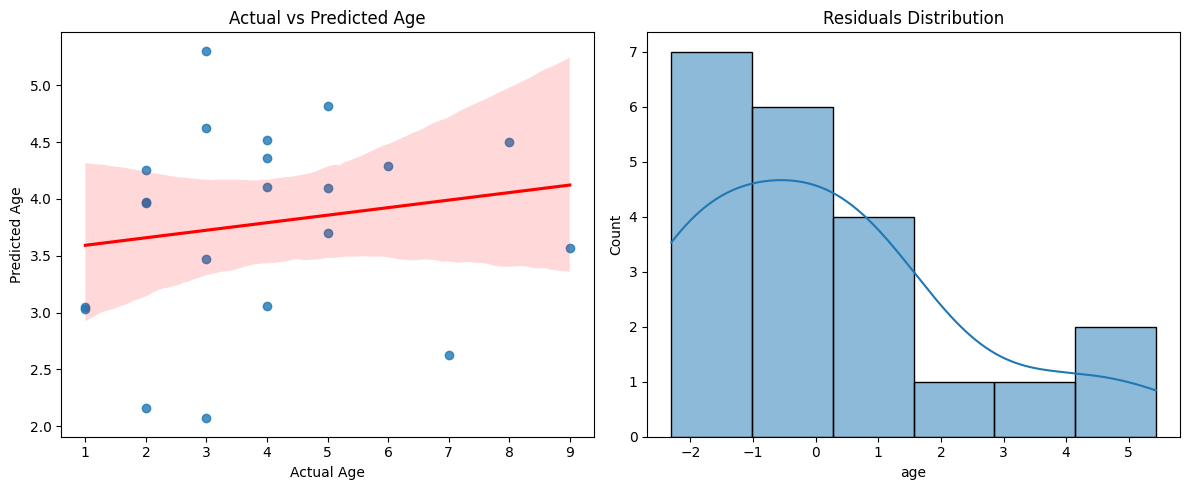


=== Head Length Prediction Model ===
MSE: 3.13
R²: 0.76


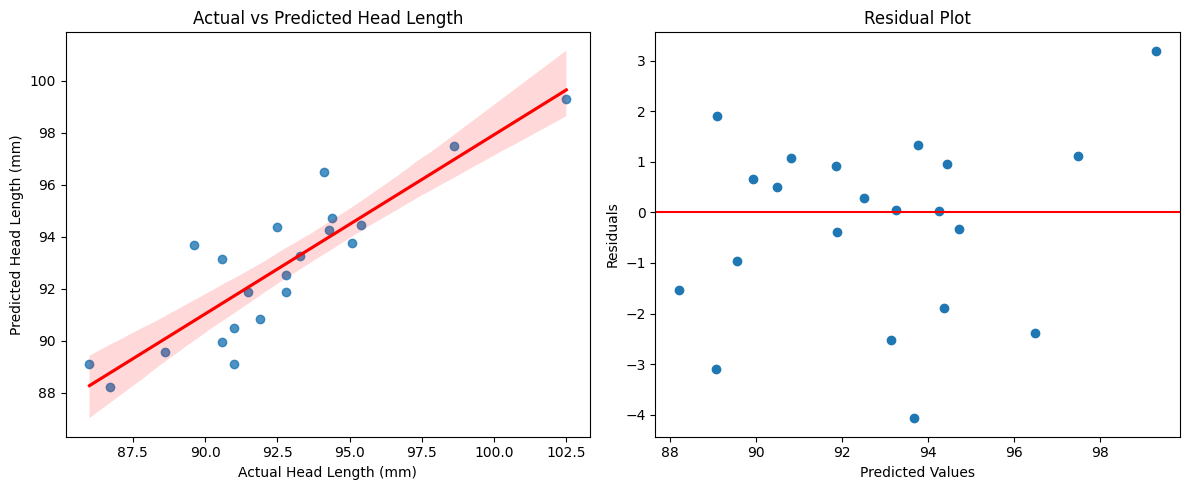


=== Sex Prediction Model ===
              precision    recall  f1-score   support

      Female       0.57      0.44      0.50         9
        Male       0.64      0.75      0.69        12

    accuracy                           0.62        21
   macro avg       0.61      0.60      0.60        21
weighted avg       0.61      0.62      0.61        21



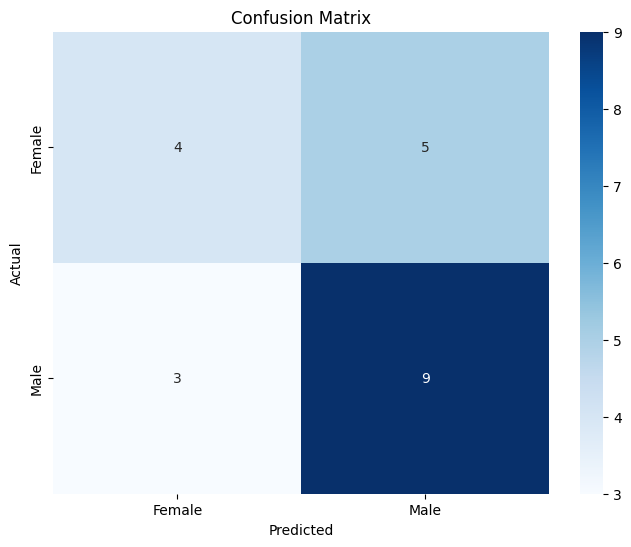

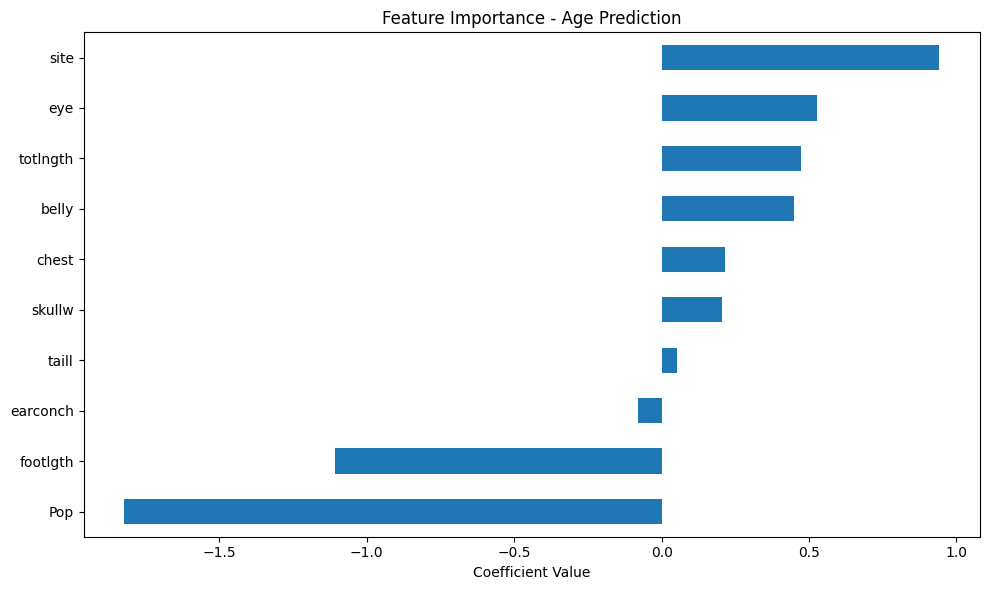

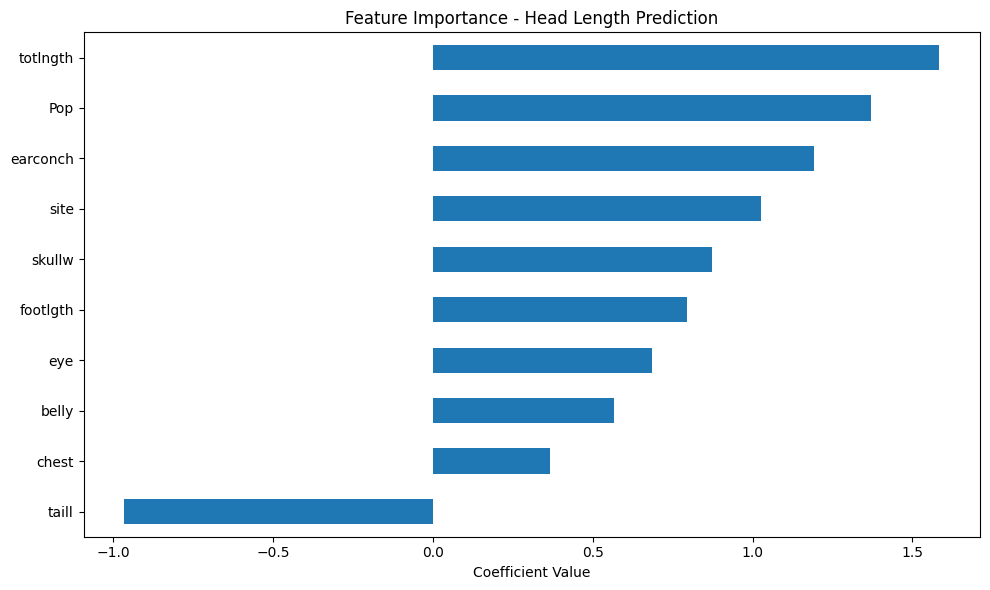

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, confusion_matrix, classification_report

def test_and_visualize_models(age_model, hdl_model, sex_model,
                             X_test_age, X_test_hdl, X_test_sex,
                             y_test_age, y_test_hdl, y_test_sex):

    # Scale the test data (using same scalers from training)
    scaler_age = StandardScaler()
    X_test_age_scaled = scaler_age.fit_transform(X_test_age)

    scaler_hdl = StandardScaler()
    X_test_hdl_scaled = scaler_hdl.fit_transform(X_test_hdl)

    scaler_sex = StandardScaler()
    X_test_sex_scaled = scaler_sex.fit_transform(X_test_sex)

    # 1. Age Prediction Model Evaluation and Visualization
    age_pred = age_model.predict(X_test_age_scaled)
    print("\n=== Age Prediction Model ===")
    print(f"MSE: {mean_squared_error(y_test_age, age_pred):.2f}")
    print(f"R²: {r2_score(y_test_age, age_pred):.2f}")

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    sns.regplot(x=y_test_age, y=age_pred, line_kws={'color': 'red'})
    plt.title('Actual vs Predicted Age')
    plt.xlabel('Actual Age')
    plt.ylabel('Predicted Age')

    plt.subplot(1, 2, 2)
    residuals = y_test_age - age_pred
    sns.histplot(residuals, kde=True)
    plt.title('Residuals Distribution')
    plt.tight_layout()
    plt.show()

    # 2. Head Length Model Evaluation and Visualization
    hdl_pred = hdl_model.predict(X_test_hdl_scaled)
    print("\n=== Head Length Prediction Model ===")
    print(f"MSE: {mean_squared_error(y_test_hdl, hdl_pred):.2f}")
    print(f"R²: {r2_score(y_test_hdl, hdl_pred):.2f}")

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    sns.regplot(x=y_test_hdl, y=hdl_pred, line_kws={'color': 'red'})
    plt.title('Actual vs Predicted Head Length')
    plt.xlabel('Actual Head Length (mm)')
    plt.ylabel('Predicted Head Length (mm)')

    plt.subplot(1, 2, 2)
    plt.scatter(hdl_pred, y_test_hdl - hdl_pred)
    plt.axhline(y=0, color='r', linestyle='-')
    plt.title('Residual Plot')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.tight_layout()
    plt.show()

    # 3. Sex Prediction Model Evaluation and Visualization
    sex_pred = sex_model.predict(X_test_sex_scaled)
    print("\n=== Sex Prediction Model ===")
    print(classification_report(y_test_sex, sex_pred, target_names=['Female', 'Male']))

    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_test_sex, sex_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Female', 'Male'],
                yticklabels=['Female', 'Male'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Feature Importance for Regression Models
    plot_feature_importance(age_model, X_test_age.columns, 'Age Prediction')
    plot_feature_importance(hdl_model, X_test_hdl.columns, 'Head Length Prediction')

def plot_feature_importance(model, feature_names, title):
    if hasattr(model, 'coef_'):
        importance = model.coef_
    else:
        return

    plt.figure(figsize=(10, 6))
    feat_importances = pd.Series(importance, index=feature_names)
    feat_importances.sort_values().plot(kind='barh')
    plt.title(f'Feature Importance - {title}')
    plt.xlabel('Coefficient Value')
    plt.tight_layout()
    plt.show()

# After training all models in your main code
test_and_visualize_models(age_model, hdl_model, sex_model,
                         X_test_age, X_test_hdl, X_test_sex,
                         y_test_age, y_test_hdl, y_test_sex)